**Problem 19**

DAYANANDASHABARI S - 22BTRCL045

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

a_hosp=pd.read_csv("AYUSHHospitals.csv")
a_hosp.drop(['Srl no.'], axis=1, inplace=True)

census_data=pd.read_csv("Clean_data.csv")

aggregations = {
    "Population": "sum",
    "Male": "sum",
    "Female": "sum",
    "Literate": "sum",
    "Literate_Male": "sum",
    "Literate_Female": "sum",
    "Households_Rural": "sum",
    "Households_Urban": "sum",
    "Households": "sum",
    "Young_and_Adult": "sum",
    "Middle_Aged": "sum",
    "Senior_Citizen": "sum",
    "Age_Not_Stated": "sum"
}

# Group by "State/UT" and apply the aggregations
df = census_data.groupby("State/UT").agg(aggregations)

left_join=pd.merge(a_hosp,df,on='State/UT',how='left')

left_join['hospital_ratio'] =a_hosp['No_of GHospitals']/census_data['Population']


# Convert data to a DataFrame
df = pd.DataFrame(left_join)

# Melt the DataFrame to create a long-form DataFrame for seaborn
df_melted = df.melt(id_vars='State/UT', var_name='Stratum', value_name='Value')

# List of socio-economic strata to compare
strata = ['Population', 'Literate', 'Households', 'Young_and_Adult', 'Middle_Aged', 'Senior_Citizen']

# Create the combined plot with subplots
num_plots = len(strata)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))

for i, stratum in enumerate(strata):
    row = i // num_cols
    col = i % num_cols
    sns.barplot(data=df_melted, x='State/UT', y='Value', hue='Stratum', ax=axs[row, col])
    axs[row, col].set_title(stratum)
    axs[row, col].set_xlabel('State/UT')
    axs[row, col].set_ylabel('Value')

# Remove unused subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()

**Problem 20**

DAYANANDASHABARI S - 22BTRCL045

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

census_data=pd.read_csv("/content/Clean_data.csv")
df=pd.DataFrame(census_data)
# Assuming a fixed area of 100 square kilometers for each district
approx_area_km2 = 100

# Calculate population density (population per square kilometer)
df['Population Density'] = df['Population'] / approx_area_km2

# Identify the most densely populated districts in each state
most_densely_populated = df.groupby('State name').apply(lambda x: x.nlargest(1, 'Population Density')).reset_index(drop=True)

# Visualize population density using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=most_densely_populated, x='District name', y='Population Density', hue='State name')
plt.xlabel('District')
plt.ylabel('Population Density (per sq. km)')
plt.title('Most Densely Populated Districts in Each State')
plt.xticks(rotation=45, ha='right')
plt.legend(title='State', loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3, prop={'size': 7})
plt.tight_layout()
plt.show()

**PROBLEM 21**

VISHNU ROOPESH - 22BTRCL169

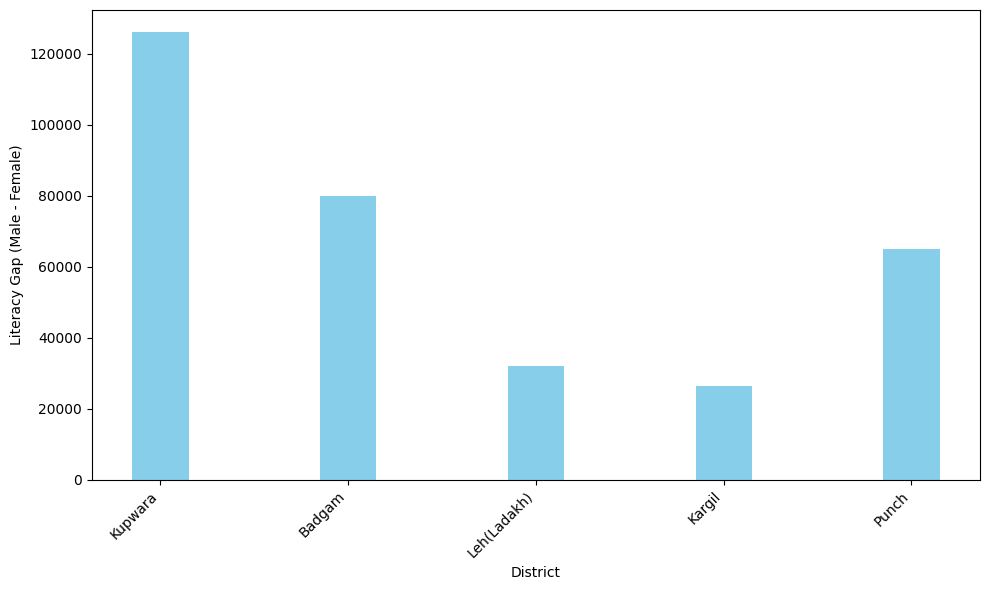

In [9]:
#Problem21
data = {
    'District code': [1, 2, 3, 4, 5],
    'State name': ['JAMMU AND KASHMIR', 'JAMMU AND KASHMIR', 'JAMMU AND KASHMIR', 'JAMMU AND KASHMIR', 'JAMMU AND KASHMIR'],
    'District name': ['Kupwara', 'Badgam', 'Leh(Ladakh)', 'Kargil', 'Punch'],
    'Male': [474190, None, 78971, None, 251899],
    'Female': [396164, 355704, 54516, 63017, 224936],
    'Male_Literate': [282823, 207741, 62834, 56301, 163333],
    'Female_Literate': [156831, 127908, 30936, 29935, 98391]
}

df = pd.DataFrame(data)

df['Literacy_Gap'] = df['Male_Literate'] - df['Female_Literate']

plt.figure(figsize=(10, 6))
plt.bar(df['District name'], df['Literacy_Gap'], color='skyblue', width=0.3)
plt.xlabel('District')
plt.ylabel('Literacy Gap (Male - Female)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**PROBLEM 22**

GUNJ CHARAN WAGHMARE - 22BTRCL058

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'census' is your DataFrame containing population data
state_population = census.groupby('State/UT')['Population'].sum()

# Merge hospital and government hospital data on 'State/UT'
merged_data = pd.merge(hospital, gov_hospitals, on='State/UT')
merged_data = pd.merge(merged_data, state_population, on='State/UT')

# Calculate per capita figures
merged_data['urban_hospital_per_capita'] = merged_data['Urban_Government_Hospitals'] / merged_data['Population']
merged_data['rural_hospital_per_capita'] = merged_data['Rural_Government_Hospitals'] / merged_data['Population']

# Plot comparison of healthcare facilities between urban and rural areas
plt.figure(figsize=(12, 8))
plt.scatter(merged_data['Urban_Government_Hospitals'], merged_data['Urban_Government_Beds'],
            s=merged_data['urban_hospital_per_capita'] * 999999, color='blue', label='Urban')
plt.scatter(merged_data['Rural_Government_Hospitals'], merged_data['Rural_Government_Beds'],
            s=merged_data['rural_hospital_per_capita'] * 999999, color='red', label='Rural')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Hospitals (log scale)')
plt.ylabel('Number of Hospital Beds (log scale)')
plt.title('Comparison of Healthcare Facilities Between Urban and Rural Areas (log scale)')
plt.legend()

# Customize the grid
plt.grid(True, which='both', linestyle='-', linewidth=0.9)  # Show grid lines for both major and minor ticks
plt.minorticks_on()  # Turn on minor ticks
plt.grid(which='minor', alpha=0.2)  # Set alpha (transparency) for minor grid lines

# Save the plot as an image file
plt.savefig('healthcare_facilities_comparison.png')

# Show the plot
plt.show()


**PROBLEM 23**

GUNJ CHARAN WAGHMARE - 22BTRCL058

In [ ]:
ayush = pd.read_csv("AYUSH.csv")
ayush

In [ ]:
ayush.columns

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Limit ayush dataframe to the first 36 rows
ayush = ayush[:36]

# Extract relevant columns from the dataframe
ayush_hospitals = ayush[['State / UT', 'Total_No_of_Hospitals']]
ayush_beds = ayush[['State / UT', 'Total_No_of_Hospitals']]

# Set up the figure and axes for subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot the number of AYUSH hospitals by state
sns.barplot(x='State / UT', y='Total_No_of_Hospitals', data=ayush_hospitals, ax=axs[0])
axs[0].set_yscale('log')
axs[0].set_title('Number of AYUSH Hospitals by State')
axs[0].set_xlabel('State/UT')
axs[0].set_ylabel('Total Number of Hospitals (log scale)')

# Plot the number of AYUSH hospital beds by state
sns.barplot(x='State / UT', y='Total_No_of_Hospitals', data=ayush_beds, ax=axs[1])
axs[1].set_yscale('log')
axs[1].set_title('Number of AYUSH Hospital Beds by State')
axs[1].set_xlabel('State/UT')
axs[1].set_ylabel('Total Number of Hospital Beds (log scale)')

plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=75)
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=75)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


**PROBLEM 24**

SURAJ J - 22BTRCL153

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the data
# Update the path to your housing data file
housing_data = pd.read_csv('/content/housing.csv')

# Step 2: Calculate metrics
# Calculate the proportion of rural households that are livable and have toilets on the premises
housing_data['Rural_Proportion_Livable'] = housing_data['Households_Rural_Livable'] / housing_data['Households_Rural']
housing_data['Rural_Proportion_Toilet'] = housing_data['Households_Rural_Toilet_Premise'] / housing_data['Households_Rural']

# Calculate the proportion of urban households that are livable and have toilets on the premises
housing_data['Urban_Proportion_Livable'] = housing_data['Households_Urban_Livable'] / housing_data['Households_Urban']
housing_data['Urban_Proportion_Toilet'] = housing_data['Households_Urban_Toilet_Premise'] / housing_data['Households_Urban']

# Step 3: Visualize the data using bar charts
# Set the figure size and style
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

# Bar chart for rural livability and toilet availability
sns.barplot(x='District', y='Rural_Proportion_Livable', data=housing_data, color='skyblue', label='Proportion Livable')
sns.barplot(x='District', y='Rural_Proportion_Toilet', data=housing_data, color='lightgreen', alpha=0.7, label='Proportion with Toilets')

# Customize plot
plt.title('Rural Housing Conditions Across Districts', fontsize=16)
plt.xlabel('District', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Plotting urban livability and toilet availability across districts
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

sns.barplot(x='District', y='Urban_Proportion_Livable', data=housing_data, color='skyblue', label='Proportion Livable')
sns.barplot(x='District', y='Urban_Proportion_Toilet', data=housing_data, color='lightgreen', alpha=0.7, label='Proportion with Toilets')

# Customize plot
plt.title('Urban Housing Conditions Across Districts', fontsize=16)
plt.xlabel('District', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


**PROBLEM 25**

SURAJ J - 22BTRCL153

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load combined data
data = pd.read_csv('merged_hospital_census_data.csv')

# Convert HospitalBeds and Population columns to numeric data types
data['HospitalBeds'] = pd.to_numeric(data['HospitalBeds'], errors='coerce')
data['Population'] = pd.to_numeric(data['Population'], errors='coerce')

# Group data by state and aggregate beds and population
state_data = data.groupby('State/UT').agg({
    'HospitalBeds': 'sum',  # Sum the hospital beds for each state
    'Population': 'sum'     # Sum the population for each state
}).reset_index()

# Calculate beds per thousand people
state_data['beds_per_thousand'] = (state_data['HospitalBeds'] / state_data['Population']) * 1000

# Print the calculated data
print("Calculated Data: Beds per Thousand People by State/UT")
print(state_data[['State/UT', 'beds_per_thousand']])

# Visualize the data

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(x='beds_per_thousand', y='State/UT', data=state_data, palette='coolwarm')

# Add title and labels
plt.title('Hospital Beds per Thousand People by State/UT')
plt.xlabel('Beds per Thousand People')
plt.ylabel('State/UT')

# Display the plot
plt.show()

**PROBLEM 26**

SURAJ J - 22BTRCL153

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load census data and hospital data from CSV files
census_data = pd.read_csv('Clean_Data/census.csv')
hospital_data = pd.read_csv('/content/all_hospitals (1).csv')

# Calculate total age population by summing age group columns
census_data['Total_Age_Population'] = (
    census_data['Age_Group_0_29'] +
    census_data['Age_Group_30_49'] +
    census_data['Age_Group_50'] +
    census_data['Age not stated']
)

# Calculate gender ratio (Male / Female)
census_data['Gender_Ratio'] = census_data['Male'] / census_data['Female']

# Calculate total literacy (sum of Literate_Male and Literate_Female)
census_data['Total_Literacy'] = census_data['Male_Literate'] + census_data['Female_Literate']

# Merge census and hospital data on a common key (e.g., 'State/UT')
merged_data = pd.merge(census_data, hospital_data, left_on='State name', right_on='State/UT')

# Calculate beds per capita (beds per 1000 people)
merged_data['Beds_per_Capita'] = (merged_data['HospitalBeds'] / merged_data['Population']) * 1000

# Visualize the correlation between total age population and beds per capita
sns.lmplot(x='Total_Age_Population', y='Beds_per_Capita', data=merged_data, aspect=1.5)
plt.xlabel('Total Age Population')
plt.ylabel('Beds per Capita')
plt.title('Correlation between Total Age Population and Beds per Capita')
plt.show()

# Visualize the correlation between gender ratio and beds per capita
sns.lmplot(x='Gender_Ratio', y='Beds_per_Capita', data=merged_data, aspect=1.5)
plt.xlabel('Gender Ratio (Males per Female)')
plt.ylabel('Beds per Capita')
plt.title('Correlation between Gender Ratio and Beds per Capita')
plt.show()

# Visualize the correlation between total literacy and beds per capita
sns.lmplot(x='Total_Literacy', y='Beds_per_Capita', data=merged_data, aspect=1.5)
plt.xlabel('Total Literacy')
plt.ylabel('Beds per Capita')
plt.title('Correlation between Total Literacy and Beds per Capita')
plt.show()

# Print merged data to examine the results and correlations
print(merged_data)

#